In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cali_house_prices = pd.read_csv("data/california_housing_prices.csv")

cali_house_prices.drop(["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", "ocean_proximity"], axis=1, inplace=True)
cali_house_prices.rename(columns={
    "median_house_value": "value"
}, inplace=True)

# median_income is initially a factor of the house value, convert median_income to real dollars
cali_house_prices["median_income"] = cali_house_prices["value"]*cali_house_prices["median_income"]

cali_house_prices

,median_income,value
0,3767985.52,452600.0
1,2976051.90,358500.0
2,2555330.54,352100.0
3,1925990.03,341300.0
4,1316169.64,342200.0
...,...,...
20635,121859.43,78100.0
20636,197129.28,77100.0
20637,156910.00,92300.0
20638,158151.84,84700.0


In [14]:
us_re_interest_rates = pd.read_csv("data/us_real_estate_interest_rates.csv")

us_re_interest_rates.drop(["FEDFUNDS", "Owner-Occupied-Home-Proportion", "Year", "Month", "Quarter", "Region", "Home Size", "Number of Households (Thousands)", "Median Income - Current Dollars", "Mean Income - Current Dollars", "Year-Quarter-Month", "Mean Income - 2022 Dollars"], axis=1, inplace=True)
us_re_interest_rates.rename(columns={
    "30-Year-Mortgage-Rate": "mortgage_rate",
    "Consumer-Price-Index": "consumer_price_index",
    "Average Sales Price": "value",
    "Median Income - 2022 Dollars": "median_income"
}, inplace=True)

# reorder columns to match cali_house_prices
us_re_reordering = ["median_income", "value", "mortgage_rate", "consumer_price_index"]
us_re_interest_rates = us_re_interest_rates[us_re_reordering]

us_re_interest_rates

,median_income,value,mortgage_rate,consumer_price_index
0,65640.0,88200.0,4.432,235.288
1,65640.0,51400.0,4.432,235.288
2,65640.0,72000.0,4.432,235.288
3,71620.0,92600.0,4.432,235.288
4,71620.0,48700.0,4.432,235.288
...,...,...,...,...
1570,74580.0,80200.0,6.364,298.812
1571,74580.0,122100.0,6.364,298.812
1572,82890.0,162400.0,6.364,298.812
1573,82890.0,77600.0,6.364,298.812


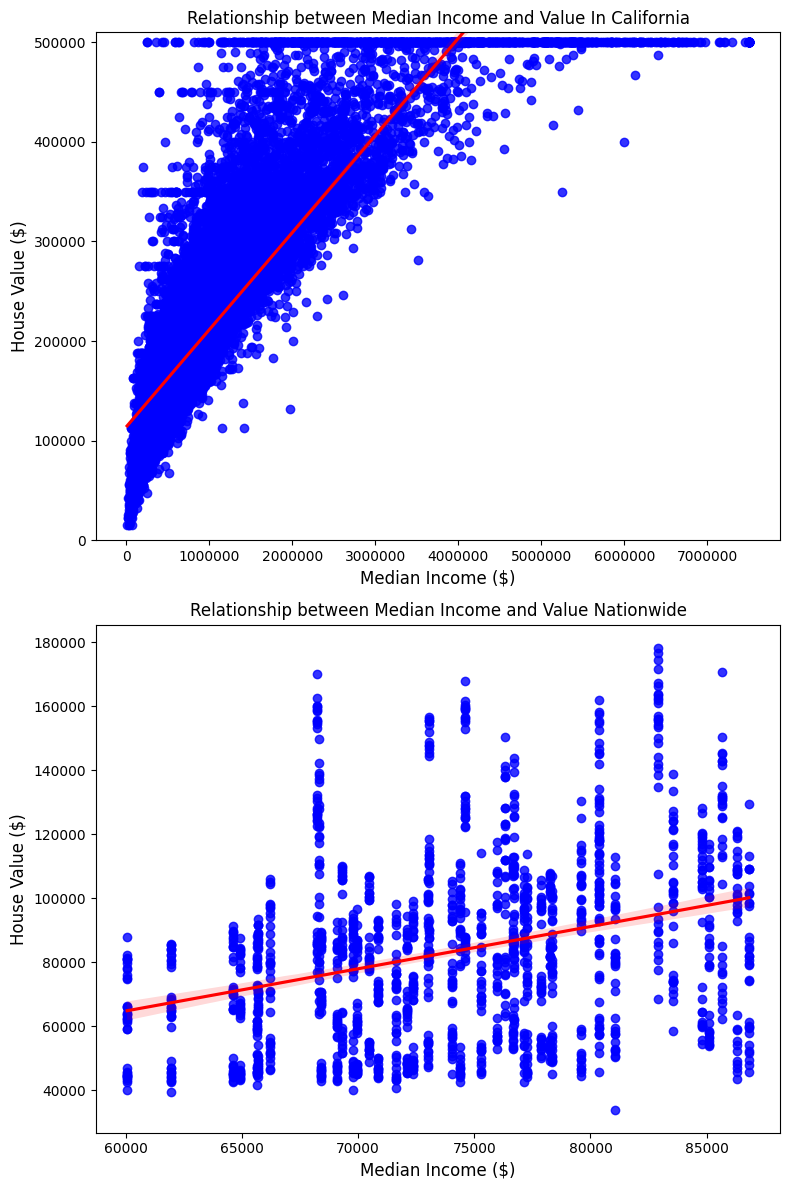

In [24]:
# Create a figure with two subplots (1 row, 2 columns)
plt.figure(figsize=(8, 12))
                     

# First subplot
plt.subplot(2, 1, 1)  # (rows, columns, index)
sns.regplot(data=cali_house_prices, x='median_income', y='value', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.ticklabel_format(style='plain', axis='x')
plt.title('Relationship between Median Income and Value In California')
plt.xlabel('Median Income ($)', fontsize=12)  # Customize x-axis label
plt.ylabel('House Value ($)', fontsize=12)  # Customize y-axis label
                     
plt.ylim(0, 510000)

# Second subplot
plt.subplot(2, 1, 2)  # (rows, columns, index)
sns.regplot(data=us_re_interest_rates, x='median_income', y='value', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

plt.title('Relationship between Median Income and Value Nationwide')
plt.xlabel('Median Income ($)', fontsize=12)  # Customize x-axis label
plt.ylabel('House Value ($)', fontsize=12)  # Customize y-axis label

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()